In [1]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from loader import load_news_data
import matplotlib.pyplot as plt
import seaborn as sns
import talib             
import pynance as py  
import quantstats as qs 
import numpy as np
import pandas as pd


df = load_news_data('../data/AMZN.csv')
print(df.head())
print(df.columns)

Loading data from ../data/AMZN.csv...
         Date  Close    High     Low    Open     Volume
0  2009-01-02  2.718  2.7265  2.5535  2.5675  145928000
1  2009-01-05  2.703  2.7870  2.6515  2.7865  190196000
2  2009-01-06  2.868  2.9110  2.6875  2.7275  221602000
3  2009-01-07  2.810  2.8475  2.7675  2.8145  158854000
4  2009-01-08  2.858  2.8660  2.7290  2.7495  131558000
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [2]:
# Clean stock data

# Remove rows with missing values
data = df.dropna()

# Ensure correct data types
for col in ['Open','High','Low','Close','Volume']:
    data[col] = data[col].astype(float)

         count          mean           std           min           25%  \
Close   3774.0  5.940809e+01  5.491854e+01  2.422000e+00  1.219450e+01   
High    3774.0  6.011639e+01  5.561078e+01  2.505000e+00  1.230025e+01   
Low     3774.0  5.866949e+01  5.423398e+01  2.381500e+00  1.204212e+01   
Open    3774.0  5.942393e+01  5.495377e+01  2.428000e+00  1.214663e+01   
Volume  3774.0  9.185184e+07  6.057553e+07  1.762600e+07  5.586350e+07   

                 50%           75%           max  
Close   3.635950e+01  9.663825e+01  1.865705e+02  
High    3.648900e+01  9.775000e+01  1.886540e+02  
Low     3.600400e+01  9.537975e+01  1.848395e+02  
Open    3.632250e+01  9.666350e+01  1.872000e+02  
Volume  7.520600e+07  1.086060e+08  1.166116e+09  


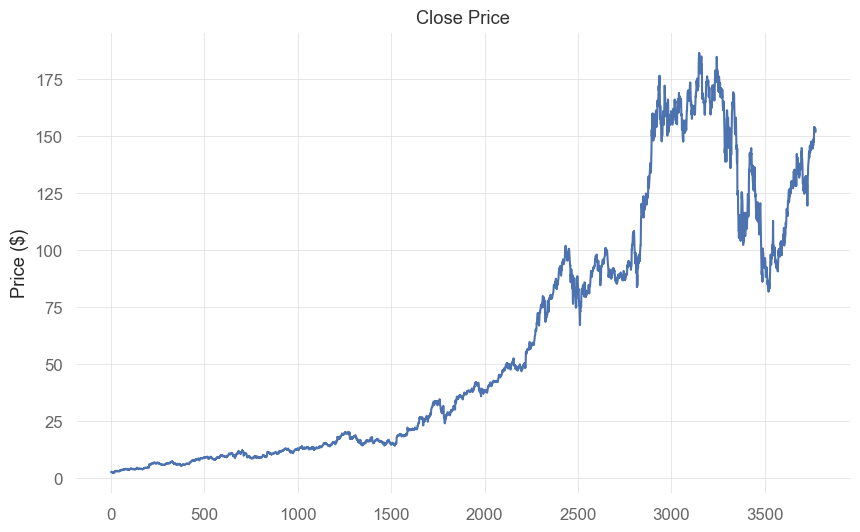

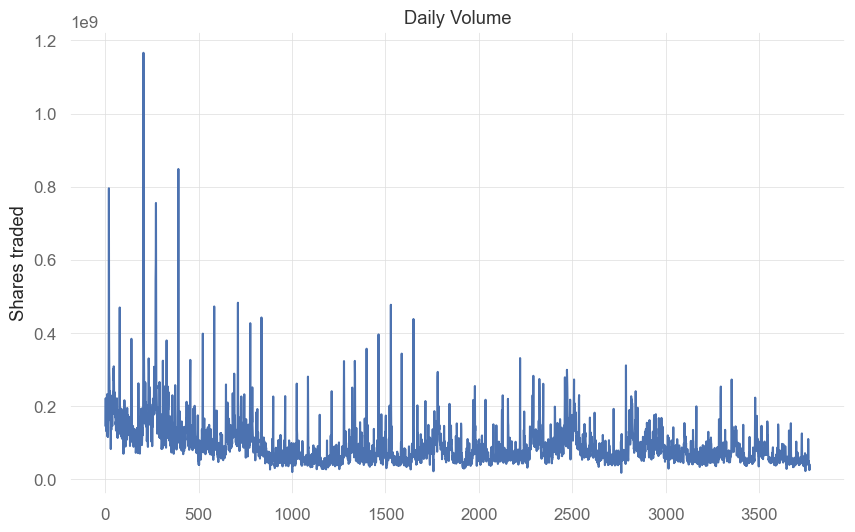

In [3]:
print(data.describe().T)

# Close price chart
data["Close"].plot(title="Close Price")
plt.ylabel("Price ($)")
plt.show()

# Volume chart
data["Volume"].plot(title="Daily Volume")
plt.ylabel("Shares traded")
plt.show()


In [4]:

if "Adj Close" in data.columns:
    price = data["Adj Close"]
else:
    price = data["Close"]

# --- Moving Averages ---
data["SMA_20"] = talib.SMA(price, timeperiod=20)
data["SMA_50"] = talib.SMA(price, timeperiod=50)
data["EMA_20"] = talib.EMA(price, timeperiod=20)

# --- RSI ---
data["RSI_14"] = talib.RSI(price, timeperiod=14)

# --- MACD ---
data["MACD"], data["MACD_signal"], data["MACD_hist"] = talib.MACD(
    price, fastperiod=12, slowperiod=26, signalperiod=9
)



data.tail()

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
3769,2023-12-22,153.419998,154.350006,152.710007,153.770004,29514100.0,148.578999,141.2430,148.860492,64.115558,3.135958,2.873052,0.262905
3770,2023-12-26,153.410004,153.979996,153.029999,153.559998,25067200.0,148.863000,141.7154,149.293779,64.085644,3.118650,2.922172,0.196478
3771,2023-12-27,153.339996,154.779999,153.119995,153.559998,31434700.0,149.178500,142.1312,149.679133,63.860893,3.063965,2.950530,0.113434
3772,2023-12-28,153.380005,154.080002,152.949997,153.720001,27057000.0,149.531499,142.5694,150.031597,63.938728,2.989395,2.958303,0.031092
3773,2023-12-29,151.940002,153.889999,151.029999,153.100006,39823200.0,149.824000,143.0456,150.213350,59.012257,2.782032,2.923049,-0.141017


In [5]:
from pynance import portfolio_optimizer as po

TICKERS = ["AMZN", "AAPL","GOOG","MSFT", "META", "NVDA"]

# Create the portfolio calculations object
portfolio = po.PortfolioCalculations(TICKERS)

print("=== Max Sharpe Portfolio (risk/return) ===")
print(portfolio.max_sharpe_portfolio("rr"))

print("\n=== Max Sharpe Portfolio weights ===")
print(portfolio.max_sharpe_portfolio("df").head())

print("\n=== Min Variance Portfolio (risk/return) ===")
print(portfolio.min_var_portfolio("rr"))

print("\n=== Min Variance Portfolio weights ===")
print(portfolio.min_var_portfolio("df").head())

c:\Users\Abenezer\Desktop\KAIM Project\nova-financial-analytics-week1\venv2\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\Abenezer\Desktop\KAIM Project\nova-financial-analytics-week1\venv2\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\Abenezer\Desktop\KAIM Project\nova-financial-analytics-week1\venv2\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is depr

=== Max Sharpe Portfolio (risk/return) ===
                   Max Sharpe Portfolio
Expected Return                  61.96%
Standard Deviation               35.59%

=== Max Sharpe Portfolio weights ===
     Portfolio Weight
AMZN            0.00%
AAPL            0.00%
GOOG           47.22%
MSFT            0.00%
META            0.00%

=== Min Variance Portfolio (risk/return) ===
                   Min Var Portfolio
Expected Return               22.17%
Standard Deviation            20.03%

=== Min Variance Portfolio weights ===
     Portfolio Weight
AMZN            0.00%
AAPL           36.41%
GOOG           15.39%
MSFT           47.22%
META            0.98%


In [6]:

print("Price & Moving Averages")
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='black', alpha=0.6)
plt.plot(data.index, data['SMA_20'], label='SMA 20', color='orange', linestyle='--')
plt.plot(data.index, data['SMA_50'], label='SMA 50', color='blue', linestyle='--')

plt.title('AMZN Price & Moving Averages')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Price & Moving Averages


MemoryError: bad allocation

<Figure size 1400x600 with 1 Axes>

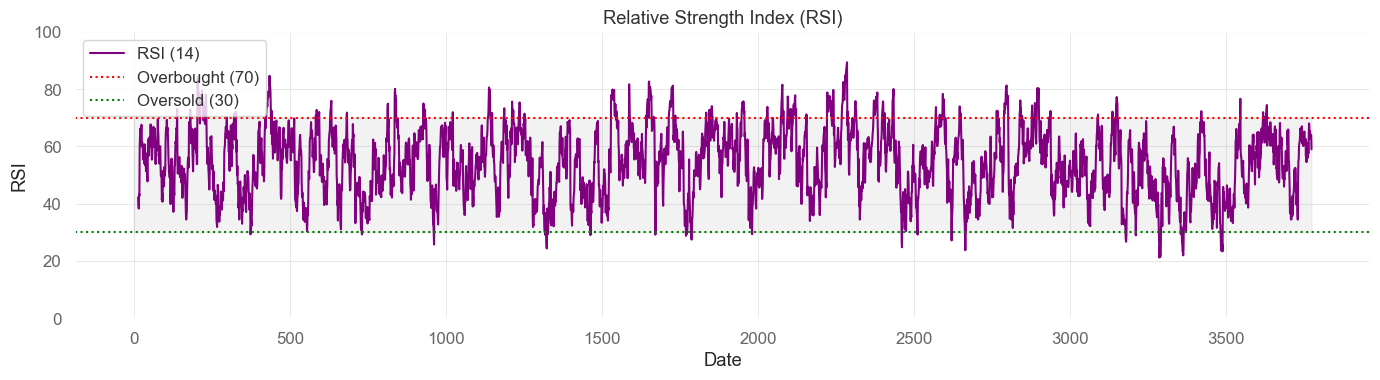

In [7]:
plt.figure(figsize=(14, 4))
plt.plot(data.index, data['RSI_14'], label='RSI (14)', color='purple')

# Add thresholds
plt.axhline(70, color='red', linestyle=':', label='Overbought (70)')
plt.axhline(30, color='green', linestyle=':', label='Oversold (30)')
plt.fill_between(data.index, 70, 30, color='gray', alpha=0.1)

plt.title('Relative Strength Index (RSI)')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



Subplot 3: MACD


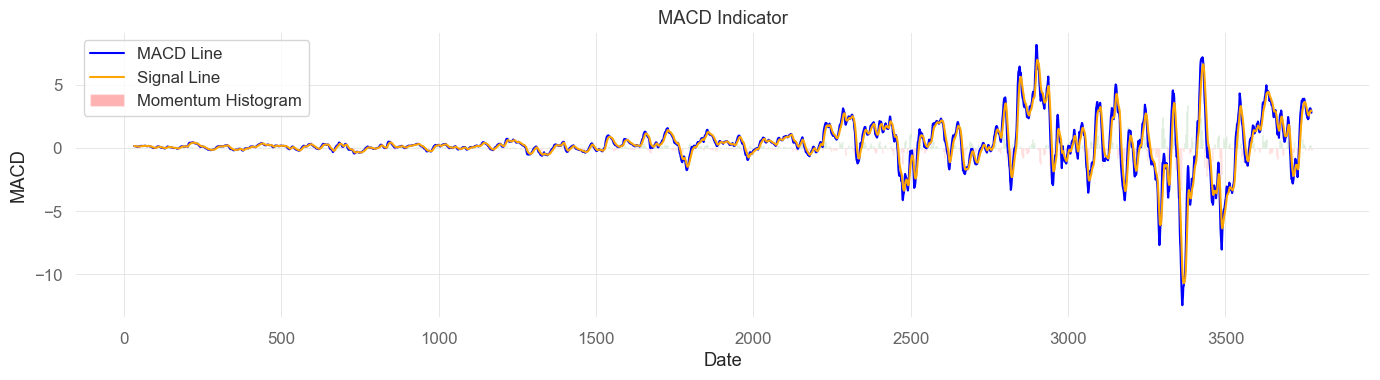

In [8]:
print("Subplot 3: MACD")

plt.figure(figsize=(14, 4))
plt.plot(data.index, data['MACD'], label='MACD Line', color='blue')
plt.plot(data.index, data['MACD_signal'], label='Signal Line', color='orange')

# Color histogram bars based on value
colors = ['green' if v >= 0 else 'red' for v in data['MACD_hist']]
plt.bar(data.index, data['MACD_hist'], color=colors, alpha=0.3, label='Momentum Histogram')

plt.title('MACD Indicator')
plt.ylabel('MACD')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()